# Images

## SIFT 

Extraction de la première catégorie depuis 'product_category_tree'...
La colonne 'product_category' n'existe pas dans le DataFrame.

Nombre total d'images dans le dossier 'DB/images/': 1053

Chargement et traitement des images...

Fusion des données produits avec les images...

Détection des points clés SIFT...

Traitement des images pour SIFT...
Image: aa68675f50a0551b8dadb954017a50a1.jpg
Nombre de points clés détectés: 20129
Dimensions des descripteurs: (20129, 128)


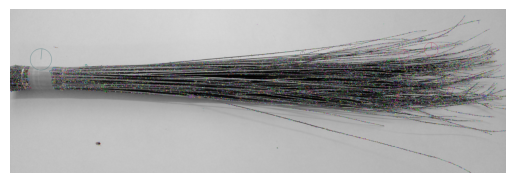

Image: 037c2402fee39fbc80433935711d1383.jpg
Nombre de points clés détectés: 10489
Dimensions des descripteurs: (10489, 128)


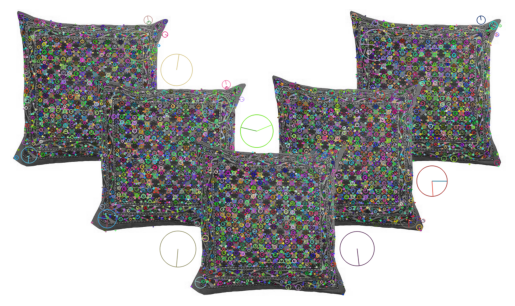

Image: 42643c1c9403f67921a18654bcf45ead.jpg
Nombre de points clés détectés: 4138
Dimensions des descripteurs: (4138, 128)


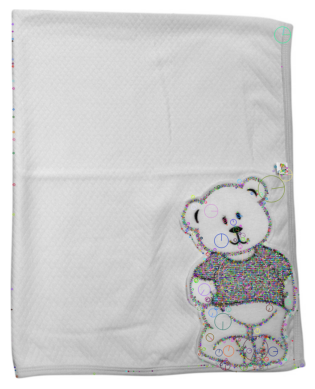

Image: 53f4bc7d7321f5c41de6b86e41f13e80.jpg
Nombre de points clés détectés: 13569
Dimensions des descripteurs: (13569, 128)


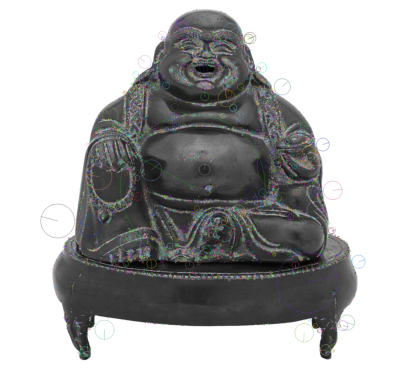

Image: b144a363c107c7bdd91f32d6e28ba6f2.jpg
Nombre de points clés détectés: 1830
Dimensions des descripteurs: (1830, 128)


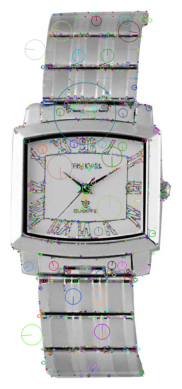

Image: db3e2eeb4fe90d4755f2911d661eae95.jpg
Nombre de points clés détectés: 5797
Dimensions des descripteurs: (5797, 128)


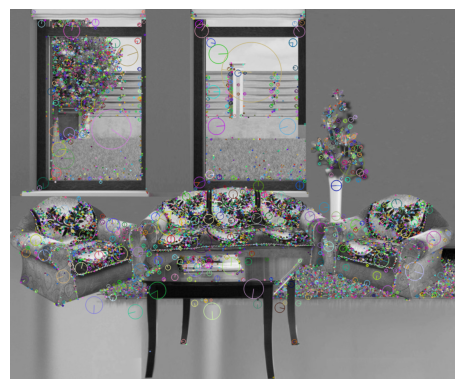

Image: 9a9402ad55d079c86c302521816b7b0e.jpg
Nombre de points clés détectés: 72
Dimensions des descripteurs: (72, 128)


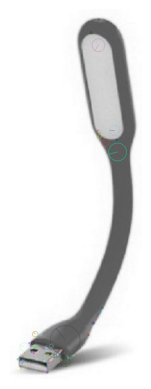

Image: 42a8fef62716772c391fbdd148cc9c16.jpg
Nombre de points clés détectés: 3452
Dimensions des descripteurs: (3452, 128)


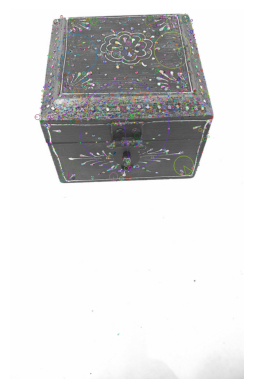

Image: 503bb08f7bdf6a395ec564dd1dc83619.jpg
Nombre de points clés détectés: 532
Dimensions des descripteurs: (532, 128)


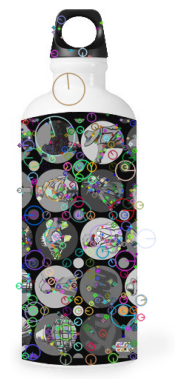

Image: 42770faa04bfcf2b62e7ef335e1b1965.jpg
Nombre de points clés détectés: 2781
Dimensions des descripteurs: (2781, 128)


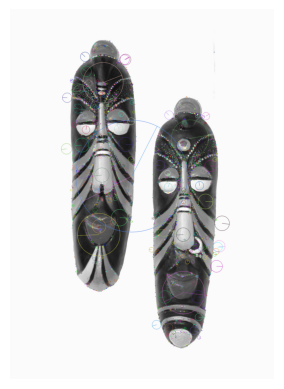

Image: 9c4ab8ab059c912090c83cb0818e7f1c.jpg
Nombre de points clés détectés: 4625
Dimensions des descripteurs: (4625, 128)


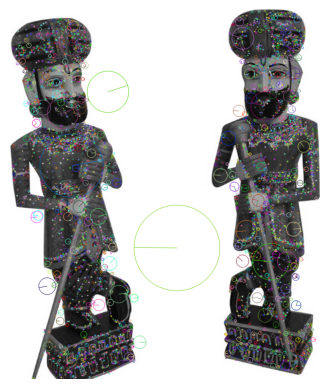

Image: f2fa99bfaa4aa65a2bd53337e140f949.jpg
Nombre de points clés détectés: 1899
Dimensions des descripteurs: (1899, 128)


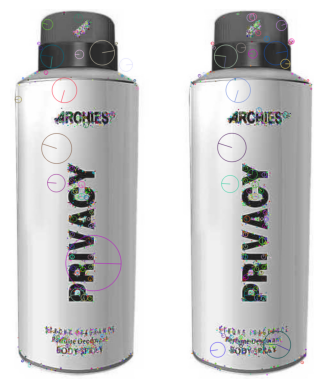

Image: a618354ba17cff64826558d81afc77ab.jpg
Nombre de points clés détectés: 2221
Dimensions des descripteurs: (2221, 128)


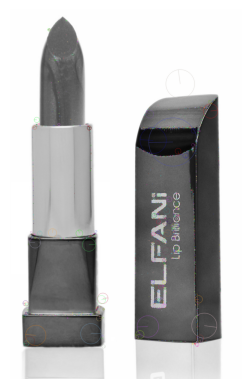

Image: c063d07d78a55a21bf6c0e7c8ae46a6d.jpg
Nombre de points clés détectés: 14875
Dimensions des descripteurs: (14875, 128)


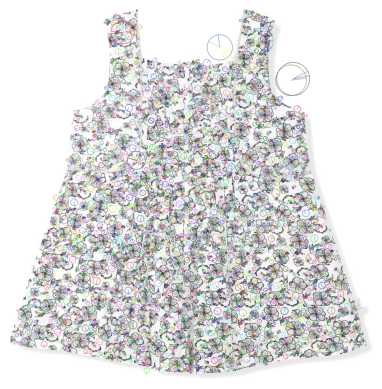

Image: e99d9abb115a9bd580bcccf9ff4d4881.jpg
Nombre de points clés détectés: 2939
Dimensions des descripteurs: (2939, 128)


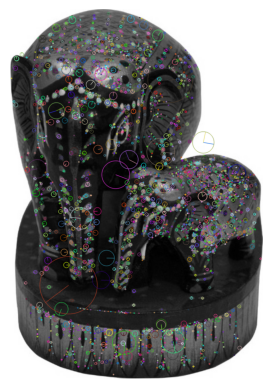

Image: 1d829e0eac91d7e85cdd6d581c363360.jpg
Nombre de points clés détectés: 1586
Dimensions des descripteurs: (1586, 128)


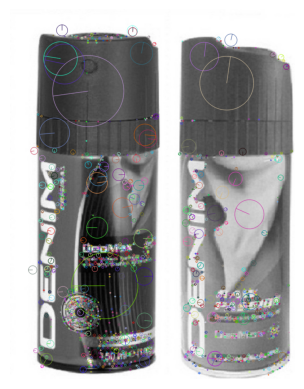

Image: 5c7b493625b5fc6689cae49d25e1ae17.jpg
Nombre de points clés détectés: 502
Dimensions des descripteurs: (502, 128)


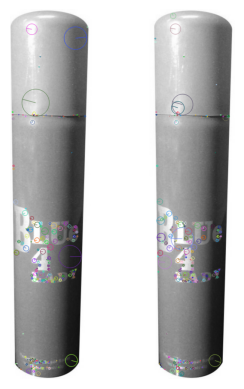

Image: 06749cbff1487f470438823f6952cfd1.jpg
Nombre de points clés détectés: 2312
Dimensions des descripteurs: (2312, 128)


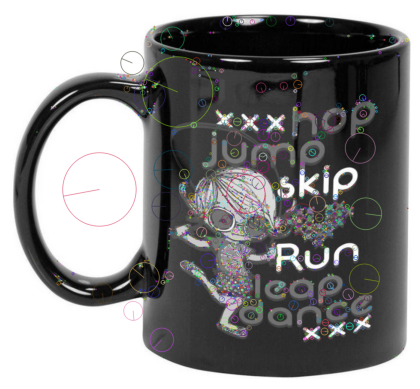

Image: ab3f4b2d2ec007b7e0eaec213bfdbffc.jpg
Nombre de points clés détectés: 1402
Dimensions des descripteurs: (1402, 128)


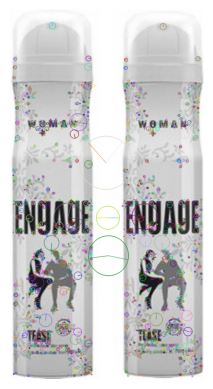

Image: 473b1ab1abe21826c41efa1584a88a63.jpg
Nombre de points clés détectés: 469
Dimensions des descripteurs: (469, 128)


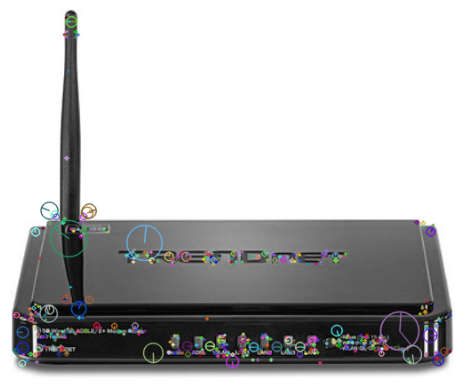


FIN


In [3]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import re
import cv2

# Import du dataset
df_product = pd.read_csv('DB/flipkart.csv')

# Nettoyer les espaces dans les noms des colonnes
df_product.columns = df_product.columns.str.strip()

# Vérification de la présence de la colonne 'product_category_tree'
if 'product_category_tree' in df_product.columns:
    print("Extraction de la première catégorie depuis 'product_category_tree'...")
    df_product['main_category'] = df_product['product_category_tree'].apply(
        lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
    )
else:
    print("La colonne 'product_category_tree' n'existe pas dans le DataFrame.")

# Fonction pour retirer le dernier caractère
def reduce_space(a):
    """
    Cette fonction retire le dernier caractère du str en entrée.
    """
    size = len(a)
    return a[:size-1]

# Enlève un espace dans les str de la colonne 'product_category', si elle existe.
if 'product_category' in df_product.columns:
    print("\nRetrait du dernier caractère dans la colonne 'product_category'...")
    df_product['product_category'] = df_product['product_category'].apply(lambda x: reduce_space(x))
else:
    print("La colonne 'product_category' n'existe pas dans le DataFrame.")

# Path du dossier des images
folder = 'DB/images/'

# Liste contenant les images du dataset.
images = []

# Vérification du nombre d'images dans le dossier
image_files = os.listdir(folder)
num_images = len(image_files)
print(f"\nNombre total d'images dans le dossier '{folder}': {num_images}")

# Chargement des images en noir & blanc.
print("\nChargement et traitement des images...")
for filename in image_files:
    # Path du fichier.
    path = folder + '/' + filename
    img = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    
    # Vérifiez si l'image a été chargée correctement
    if img is None:
        continue  # Passer à l'image suivante

    # Filtrage Median.
    img_filtre1 = cv2.medianBlur(img, 3)

    # Filtrage Gaussien.
    img_filtre2 = cv2.GaussianBlur(img_filtre1, (5, 5), 1)
    
    # Ajout de l'image filtrée à la liste des images.
    images.append(img_filtre2)

# Création de la liste des noms d'images
img_name = []
for j in image_files:
    img_name.append(j)

# DataFrame trié par l'ordre des images
df_image_order = pd.DataFrame(img_name)
df_image_order.columns = ['image']

# Fusionner les données produits avec les images
print("\nFusion des données produits avec les images...")
df_product_merged = pd.merge(df_image_order, df_product, left_on='image', right_on='image')

# Initialisation de SIFT pour détecter et afficher les points clés
print("\nDétection des points clés SIFT...")
sift = cv2.SIFT_create()

# Fonction pour afficher les points clés
def display_keypoints(image, keypoints):
    img_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(img_with_keypoints, cmap='gray')
    plt.axis('off')
    plt.show()

# Limitation du nombre d'images affichées pour réduire le poids du fichier mais le processus se déroule sur l'ensemble des images
display_count = 0  # Compteur pour limiter l'affichage
max_display = 20  # Nombre maximal d'images à afficher 

# Ignorer certains fichiers spécifiques
ignore_files = {'.DS_Store', 'test', 'train'}

# Parcours de chaque image dans le dossier pour détecter les points clés
print("\nTraitement des images pour SIFT...")
for filename in os.listdir(folder):
    if filename in ignore_files or not filename.endswith((".jpg", ".png", ".jpeg")):
        continue  # Ignorer ces fichiers

    # Chargement de l'image en niveau de gris
    image_path = os.path.join(folder, filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Vérification que l'image a été chargée
    if image is not None:
        # Détection des points clés et calcul des descripteurs
        keypoints, descriptors = sift.detectAndCompute(image, None)
        
        # Vérification si des descripteurs ont été trouvés
        if descriptors is not None:
            if display_count < max_display:
                # Affichage des informations uniquement pour les 20 premières images
                print(f"Image: {filename}")
                print(f"Nombre de points clés détectés: {len(keypoints)}")
                print(f"Dimensions des descripteurs: {descriptors.shape}")
                
                # Affichage des points clés
                display_keypoints(image, keypoints)
                display_count += 1
    else:
        continue

print("\nFIN")


## Visual bag of words


Nombre total d'images dans le dossier 'DB/images/': 1053

Recherche des meilleurs hyperparamètres pour KMeans...
Recherche 1/16 - Paramètres: {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 7, 'n_init': 10, 'tol': 0.1}
ARI pour les paramètres {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 7, 'n_init': 10, 'tol': 0.1}: 0.0400
Recherche 2/16 - Paramètres: {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 12, 'n_init': 10, 'tol': 0.1}
ARI pour les paramètres {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 12, 'n_init': 10, 'tol': 0.1}: 0.0487
Recherche 3/16 - Paramètres: {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 13, 'n_init': 10, 'tol': 0.1}
ARI pour les paramètres {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 13, 'n_init': 10, 'tol': 0.1}: 0.0482
Recherche 4/16 - Paramètres: {'algorithm': 'lloyd', 'init': 'k-means+

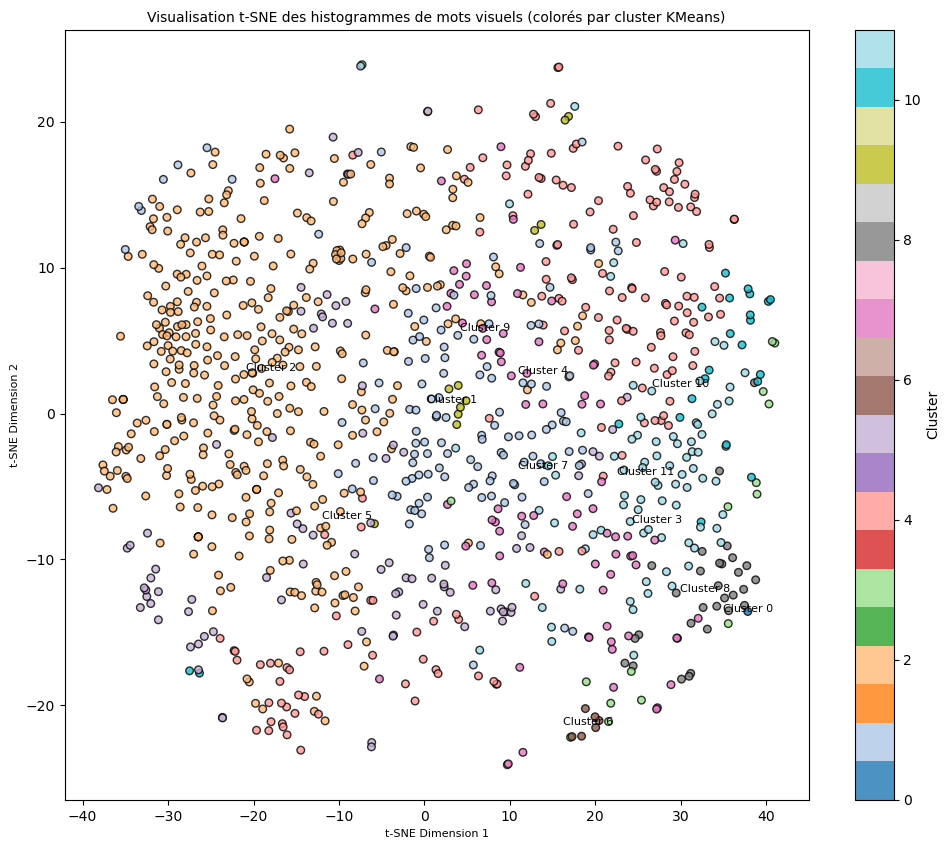


Indice de Rand Ajusté (ARI) final : 0.0584

FIN


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import re
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
from keras.applications.efficientnet import EfficientNetB0, preprocess_input
from keras.preprocessing import image as keras_image
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
import contextlib
import sys
from sklearn.preprocessing import LabelEncoder

# Charger le dataset Flipkart
df_product = pd.read_csv('DB/flipkart.csv')
df_product.columns = df_product.columns.str.strip()

# Extraire la première catégorie de 'product_category_tree' si elle est présente
if 'product_category_tree' in df_product.columns:
    df_product['main_category'] = df_product['product_category_tree'].apply(
        lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
    )

# Répertoire des images
folder = 'DB/images/'
image_files = os.listdir(folder)
print(f"\nNombre total d'images dans le dossier '{folder}': {len(image_files)}")

images = []
image_labels = []  # Liste pour stocker les étiquettes de chaque image
for filename in image_files:
    path = os.path.join(folder, filename)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    if img is not None:
        # Redimensionnement pour que l'image respecte la taille maximale de 224x224
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir en RGB
        images.append(img)
        
        # Récupérer l'étiquette de chaque image (associer avec l'image par son nom)
        category = df_product[df_product['image'] == filename]['main_category'].values
        if category:
            image_labels.append(category[0])  # Assurez-vous que la catégorie existe

# Fonction pour extraire les descripteurs SIFT et les transformer en histogrammes BoVW
def extract_vbow_histogram(image, kmeans, vocab_size):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(gray, None)
    if des is not None:
        des = des.astype(np.float64)  # Conversion explicite des descripteurs en float64
        cluster_assignments = kmeans.predict(des)  # Utilisation de descripteurs en float64
        histogram = np.zeros(vocab_size)
        for i in cluster_assignments:
            histogram[i] += 1
        return histogram
    else:
        return np.zeros(vocab_size)

# Extraction des caractéristiques des images avec SIFT et BoVW
# Créer le dictionnaire de visual words en utilisant KMeans sur tous les descripteurs
all_descriptors = []
for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(gray, None)
    if des is not None:
        all_descriptors.append(des)

# Empiler tous les descripteurs pour le clustering
all_descriptors = np.vstack(all_descriptors)

# Appliquer KMeans pour créer le vocabulaire de visual words
vocab_size = 50  # Le nombre de clusters ou visual words
kmeans = KMeans(n_clusters=vocab_size, random_state=0)
kmeans.fit(all_descriptors.astype(np.float64))  # Conversion en float64 pour éviter l'erreur

# Extraire les histogrammes BoVW pour chaque image
features = []
for img in images:
    histogram = extract_vbow_histogram(img, kmeans, vocab_size)
    features.append(histogram)

# Recherche des meilleurs hyperparamètres pour KMeans
print("\nRecherche des meilleurs hyperparamètres pour KMeans...")

param_grid = {
    'n_clusters': [7,12, 13, 11],
    'init': ['k-means++', 'random'],
    'max_iter': [1000],
    'n_init': [10],
    'tol': [1e-1],
    'algorithm': ['lloyd', 'elkan']
}

best_score = -1
best_model = None
best_params = {}

# Conversion des étiquettes des images en catégories numériques
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(image_labels)  # Convertir les étiquettes en indices numériques

# Recherche des meilleurs paramètres
for i, params in enumerate(ParameterGrid(param_grid)):
    print(f"Recherche {i+1}/{len(ParameterGrid(param_grid))} - Paramètres: {params}")
    
    kmeans = KMeans(
        n_clusters=params['n_clusters'],
        init=params['init'],
        max_iter=params['max_iter'],
        n_init=params['n_init'],
        tol=params['tol'],
        algorithm=params['algorithm'],
        random_state=0
    )
    kmeans.fit(np.array(features, dtype=np.float64))  # Convertir en float64 pour éviter l'erreur
    predicted_labels = kmeans.predict(np.array(features, dtype=np.float64))
    
    # Calcul de l'ARI (Adjusted Rand Index) si les vraies étiquettes sont disponibles
    ari_score = adjusted_rand_score(true_labels, predicted_labels[:len(true_labels)])
    print(f"ARI pour les paramètres {params}: {ari_score:.4f}")
    if ari_score > best_score:
        best_score = ari_score
        best_model = kmeans
        best_params = params

print(f"\nMeilleurs paramètres : {best_params} avec un score ARI de {best_score:.4f}")

# Réduction de dimension avec t-SNE pour la visualisation
df_histograms = np.array(features)  # Utilisation des caractéristiques extraites
scaler = StandardScaler()
df_histograms = scaler.fit_transform(df_histograms)

tsne = TSNE(n_components=2, random_state=0)
histograms_2d = tsne.fit_transform(df_histograms)

# Visualisation des données réduites en 2D avec les clusters
plt.figure(figsize=(12, 10))

# Utilisation d'une palette de couleurs plus visible
scatter = plt.scatter(histograms_2d[:, 0], histograms_2d[:, 1], 
                      c=best_model.labels_[:len(histograms_2d)], 
                      cmap='tab20', alpha=0.8, edgecolors='k', s=30)

# Ajout de la légende
plt.colorbar(scatter, label='Cluster')
plt.title("Visualisation t-SNE des histogrammes de mots visuels (colorés par cluster KMeans)", fontsize=10)
plt.xlabel("t-SNE Dimension 1", fontsize=8)
plt.ylabel("t-SNE Dimension 2", fontsize=8)

# Ajouter des labels pour les clusters
clusters = np.unique(best_model.labels_)
for cluster in clusters:
    plt.text(np.mean(histograms_2d[best_model.labels_ == cluster, 0]), 
             np.mean(histograms_2d[best_model.labels_ == cluster, 1]), 
             f'Cluster {cluster}', fontsize=8, color='black', ha='center')

plt.show()

# Calcul de l'ARI final (si les vraies étiquettes sont disponibles)
ari_score = adjusted_rand_score(true_labels, best_model.labels_[:len(true_labels)])
print(f"\nIndice de Rand Ajusté (ARI) final : {ari_score:.4f}")

print("\nFIN")
